### This document is for linking REDCap, ACCESS, and TSQIC datasets, where each row represents an id+surgery.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TSQIC tabs merging

In [2]:
# Load the Excel file
file_path = "../Nisha/Complications_TSQIC_TC_13_02_2025.xlsx" 
df_tsqic = pd.read_excel(file_path, sheet_name=None)

# Display sheet names
print(df_tsqic.keys())

# Access specific sheets/tabs
df_tsqic_1 = df_tsqic["TSQIC-Complications"]  
df_tsqic_2 = df_tsqic["TSQIC-admission-discharge dates"] 
print(df_tsqic_1)
print(df_tsqic_2)

dict_keys(['TSQIC-Complications', 'TSQIC-admission-discharge dates'])
        id date (operation) ComplicationDate     System       Complication  \
0      817       2016-09-07       2016-09-08    Cardiac       Hypotension    
1      190       2016-09-07       2016-09-08    Cardiac  Atrial Arrhythmia   
2      817       2016-09-07       2016-09-09    Cardiac  Atrial Arrhythmia   
3      190       2016-09-07       2016-09-10  Pulmonary         Hemoptysis   
4      817       2016-09-07       2016-09-11    Cardiac       Hypertension   
...    ...              ...              ...        ...                ...   
1557  1705       2024-09-04       2024-09-10  Pulmonary        Atelactasis   
1558  1705       2024-09-04       2024-09-10    Pleural           Effusion   
1559  1705       2024-09-04       2024-09-11      Anast   Mucosal necrosis   
1560  1687       2024-09-08       2024-09-16    Pleural           Effusion   
1561  1687       2024-09-08       2024-09-16    Pleural  Hydropneumothor

In [3]:
# Standardize column names for merging
df_tsqic_1 = df_tsqic_1.rename(columns={"date (operation)": "operation_date", "Readmission":"readmission_30d"})
df_tsqic_2 = df_tsqic_2.rename(columns={"Date (operation)": "operation_date"})


# Convert operation_date to datetime for proper matching
df_tsqic_1["operation_date"] = pd.to_datetime(df_tsqic_1["operation_date"])
df_tsqic_2["operation_date"] = pd.to_datetime(df_tsqic_2["operation_date"])
df_tsqic_2["DischargeDate"] = pd.to_datetime(df_tsqic_2["DischargeDate"])

In [4]:
# Remove unusable columns
df_tsqic_1 = df_tsqic_1.drop(columns=['System', 'Complication', "Grade", "GradeLetter", "Prolonged", "Comments"])
df_tsqic_1

,id,operation_date,ComplicationDate,readmission_30d
0,817,2016-09-07,2016-09-08,0
1,190,2016-09-07,2016-09-08,0
2,817,2016-09-07,2016-09-09,0
3,190,2016-09-07,2016-09-10,0
4,817,2016-09-07,2016-09-11,0
...,...,...,...,...
1557,1705,2024-09-04,2024-09-10,0
1558,1705,2024-09-04,2024-09-10,0
1559,1705,2024-09-04,2024-09-11,0
1560,1687,2024-09-08,2024-09-16,0


In [5]:
#remove when id, operation_date, readmission_30d are the same (we dont care about multiple complicationdates)
df_tsqic_1_filtered = df_tsqic_1.drop_duplicates(subset=["id", "operation_date", "readmission_30d"])
df_tsqic_1_filtered

,id,operation_date,ComplicationDate,readmission_30d
0,817,2016-09-07,2016-09-08,0
1,190,2016-09-07,2016-09-08,0
8,973,2016-09-13,2016-09-13,0
11,661,2016-09-14,2016-09-15,0
17,648,2016-09-21,2016-09-22,0
...,...,...,...,...
1551,1687,2024-08-07,2024-09-06,1
1553,1687,2024-09-07,2024-09-08,0
1554,1683,2024-09-03,2024-09-08,0
1556,1705,2024-09-04,2024-09-10,0


In [6]:
# Keep the earliest operation_date for each (id, DischargeDate) group
df_tsqic_2_filtered = df_tsqic_2.loc[df_tsqic_2.groupby(["id", "DischargeDate"])["operation_date"].idxmin()]

# Reset index if needed
df_tsqic_2_filtered = df_tsqic_2_filtered.reset_index(drop=True)

df_tsqic_2_filtered

,id,operation_date,DischargeDate
0,37,2023-05-03,2023-05-06
1,44,2019-05-21,2019-05-23
2,55,2019-10-22,2019-10-28
3,76,2021-05-18,2021-05-25
4,78,2019-12-10,2019-12-12
...,...,...,...
864,1706,2024-07-17,2024-07-31
865,1712,2024-08-20,2024-08-28
866,1722,2024-08-27,2024-09-03
867,1748,2024-07-23,2024-07-30


In [7]:
#There are only 3 ids with duplicates -> so manual check is ok -> remove earlier discharge dates make more logical after manual check
print(df_tsqic_2_filtered[df_tsqic_2_filtered.duplicated(subset=['id', 'operation_date'], keep=False)])

df_tsqic_2_filtered2 = df_tsqic_2_filtered.loc[df_tsqic_2_filtered.groupby(["id", "operation_date"])["DischargeDate"].idxmax()]
df_tsqic_2_filtered2

       id operation_date DischargeDate
26    190     2016-09-07    2016-09-07
28    190     2016-09-07    2016-09-23
113   648     2016-09-21    2016-09-21
116   648     2016-09-21    2016-10-12
768  1549     2023-03-01    2022-03-08
769  1549     2023-03-01    2023-03-08


,id,operation_date,DischargeDate
0,37,2023-05-03,2023-05-06
1,44,2019-05-21,2019-05-23
2,55,2019-10-22,2019-10-28
3,76,2021-05-18,2021-05-25
6,78,2019-09-03,2020-09-10
...,...,...,...
864,1706,2024-07-17,2024-07-31
865,1712,2024-08-20,2024-08-28
866,1722,2024-08-27,2024-09-03
867,1748,2024-07-23,2024-07-30


In [8]:
# Merge df_tsqic_1_filtered and df_tsqic_2_filtered2 on 'id' and 'operation_date'
tsqic_merged = pd.merge(df_tsqic_1_filtered, df_tsqic_2_filtered2, on=["id", "operation_date"], how="outer")


tsqic_merged = tsqic_merged.sort_values(by=["id"]).reset_index(drop=True)


# Display merged dataframe
tsqic_merged


,id,operation_date,ComplicationDate,readmission_30d,DischargeDate
0,37,2023-05-03,NaT,NaN,2023-05-06
1,44,2019-05-21,NaT,NaN,2019-05-23
2,55,2019-10-22,NaT,NaN,2019-10-28
3,76,2021-05-18,2021-05-21,0.0,2021-05-25
4,78,2019-09-03,NaT,NaN,2020-09-10
...,...,...,...,...,...
1002,1722,2024-08-27,2024-08-27,0.0,2024-09-03
1003,1748,2024-07-23,2024-08-13,0.0,2024-07-30
1004,1748,2024-08-13,2024-08-16,0.0,2024-08-30
1005,1748,2024-07-23,2024-08-12,1.0,2024-07-30


In [9]:
#all the duplicates are due to the readmission_30d values.
tsqic_merged[tsqic_merged.duplicated(subset=['id', 'operation_date'], keep=False)]

,id,operation_date,ComplicationDate,readmission_30d,DischargeDate
22,141,2019-10-08,2019-10-11,0.0,2019-10-15
23,141,2019-10-08,2019-10-19,1.0,2019-10-15
82,566,2020-03-31,2020-04-07,0.0,2020-05-08
83,566,2020-03-31,2020-05-29,1.0,2020-05-08
96,579,2020-01-24,2020-02-11,1.0,2020-01-30
...,...,...,...,...,...
979,1681,2024-08-14,2024-08-24,1.0,2024-08-22
984,1687,2024-08-07,2024-08-07,0.0,2024-08-27
985,1687,2024-08-07,2024-09-06,1.0,2024-08-27
1003,1748,2024-07-23,2024-08-13,0.0,2024-07-30


In [10]:
tsqic_merged

,id,operation_date,ComplicationDate,readmission_30d,DischargeDate
0,37,2023-05-03,NaT,NaN,2023-05-06
1,44,2019-05-21,NaT,NaN,2019-05-23
2,55,2019-10-22,NaT,NaN,2019-10-28
3,76,2021-05-18,2021-05-21,0.0,2021-05-25
4,78,2019-09-03,NaT,NaN,2020-09-10
...,...,...,...,...,...
1002,1722,2024-08-27,2024-08-27,0.0,2024-09-03
1003,1748,2024-07-23,2024-08-13,0.0,2024-07-30
1004,1748,2024-08-13,2024-08-16,0.0,2024-08-30
1005,1748,2024-07-23,2024-08-12,1.0,2024-07-30


In [11]:
#remove duplicated rows.
tsqic_merged[tsqic_merged.duplicated(subset=['id', 'readmission_30d', 'DischargeDate'], keep=False)]


tsqic_merged = tsqic_merged[~tsqic_merged.duplicated(subset=['id', 'readmission_30d', 'DischargeDate'], keep=False)]
tsqic_merged

,id,operation_date,ComplicationDate,readmission_30d,DischargeDate
0,37,2023-05-03,NaT,NaN,2023-05-06
1,44,2019-05-21,NaT,NaN,2019-05-23
2,55,2019-10-22,NaT,NaN,2019-10-28
3,76,2021-05-18,2021-05-21,0.0,2021-05-25
4,78,2019-09-03,NaT,NaN,2020-09-10
...,...,...,...,...,...
1002,1722,2024-08-27,2024-08-27,0.0,2024-09-03
1003,1748,2024-07-23,2024-08-13,0.0,2024-07-30
1004,1748,2024-08-13,2024-08-16,0.0,2024-08-30
1005,1748,2024-07-23,2024-08-12,1.0,2024-07-30


In [12]:
#when discharge date is na, remove the row when operation_date is between any other row's operation_date and DischargeDate
# Identify duplicated 'id' values
dup_mask = tsqic_merged.duplicated(subset=['id'], keep=False)

# Find rows where DischargeDate is NaT
nat_mask = tsqic_merged["DischargeDate"].isna()
readmission_mask = tsqic_merged["readmission_30d"] != 1  # Only consider rows where readmission_30d is NOT 1

# Identify rows that should be removed
to_remove = []
for idx, row in tsqic_merged[dup_mask & nat_mask & readmission_mask].iterrows():
    # Get all rows with the same id that have a valid DischargeDate
    same_id_rows = tsqic_merged[(tsqic_merged["id"] == row["id"]) & (~nat_mask)]
    
    # Check if operation_date falls between any other row's operation_date and DischargeDate
    for _, other_row in same_id_rows.iterrows():
        if other_row["operation_date"] < row["operation_date"] < other_row["DischargeDate"]:
            to_remove.append(idx)
            break  # No need to check further, we mark it for removal

# Remove the identified rows
tsqic_merged_filtered = tsqic_merged.drop(index=to_remove)

# Reset index
tsqic_merged_filtered = tsqic_merged_filtered.reset_index(drop=True)

# Display the result
tsqic_merged_filtered


,id,operation_date,ComplicationDate,readmission_30d,DischargeDate
0,37,2023-05-03,NaT,NaN,2023-05-06
1,44,2019-05-21,NaT,NaN,2019-05-23
2,55,2019-10-22,NaT,NaN,2019-10-28
3,76,2021-05-18,2021-05-21,0.0,2021-05-25
4,78,2019-09-03,NaT,NaN,2020-09-10
...,...,...,...,...,...
924,1712,2024-08-20,2024-08-24,0.0,2024-08-28
925,1722,2024-08-27,2024-08-27,0.0,2024-09-03
926,1748,2024-07-23,2024-08-13,0.0,2024-07-30
927,1748,2024-08-13,2024-08-16,0.0,2024-08-30


In [13]:
#create a new binary column postop_comp
tsqic_merged_filtered['postop_comp'] = tsqic_merged_filtered['ComplicationDate'].notna().astype(int)
tsqic_merged_filtered

,id,operation_date,ComplicationDate,readmission_30d,DischargeDate,postop_comp
0,37,2023-05-03,NaT,NaN,2023-05-06,0
1,44,2019-05-21,NaT,NaN,2019-05-23,0
2,55,2019-10-22,NaT,NaN,2019-10-28,0
3,76,2021-05-18,2021-05-21,0.0,2021-05-25,1
4,78,2019-09-03,NaT,NaN,2020-09-10,0
...,...,...,...,...,...,...
924,1712,2024-08-20,2024-08-24,0.0,2024-08-28,1
925,1722,2024-08-27,2024-08-27,0.0,2024-09-03,1
926,1748,2024-07-23,2024-08-13,0.0,2024-07-30,1
927,1748,2024-08-13,2024-08-16,0.0,2024-08-30,1


In [14]:
# Compute the difference between ComplicationDate and operation_date
tsqic_merged_filtered['days_diff'] = (tsqic_merged_filtered['ComplicationDate'] - tsqic_merged_filtered['operation_date']).dt.days

# rows where ComplicationDate is within 90 days of operation_date
tsqic_merged_filtered[tsqic_merged_filtered['days_diff'] > 90]

tsqic_merged_filtered = tsqic_merged_filtered[~(tsqic_merged_filtered['days_diff'] < 0)]

# Remove not needed columns
tsqic_merged_filtered=tsqic_merged_filtered.drop(columns=["ComplicationDate"])
tsqic_merged_filtered=tsqic_merged_filtered.drop(columns=["days_diff"])
tsqic_merged_filtered

,id,operation_date,readmission_30d,DischargeDate,postop_comp
0,37,2023-05-03,NaN,2023-05-06,0
1,44,2019-05-21,NaN,2019-05-23,0
2,55,2019-10-22,NaN,2019-10-28,0
3,76,2021-05-18,0.0,2021-05-25,1
4,78,2019-09-03,NaN,2020-09-10,0
...,...,...,...,...,...
924,1712,2024-08-20,0.0,2024-08-28,1
925,1722,2024-08-27,0.0,2024-09-03,1
926,1748,2024-07-23,0.0,2024-07-30,1
927,1748,2024-08-13,0.0,2024-08-30,1


In [15]:
# Calculate LOS (Length of Stay)
tsqic_merged_filtered['estimated_los'] = (tsqic_merged_filtered['DischargeDate'] - tsqic_merged_filtered['operation_date']).dt.days

# Ensure LOS is NaN when either date is missing
tsqic_merged_filtered['estimated_los'] = np.where(
    tsqic_merged_filtered['DischargeDate'].isna() | tsqic_merged_filtered['operation_date'].isna(),
    np.nan,
    tsqic_merged_filtered['estimated_los']
)

tsqic_merged_filtered


,id,operation_date,readmission_30d,DischargeDate,postop_comp,estimated_los
0,37,2023-05-03,NaN,2023-05-06,0,3.0
1,44,2019-05-21,NaN,2019-05-23,0,2.0
2,55,2019-10-22,NaN,2019-10-28,0,6.0
3,76,2021-05-18,0.0,2021-05-25,1,7.0
4,78,2019-09-03,NaN,2020-09-10,0,373.0
...,...,...,...,...,...,...
924,1712,2024-08-20,0.0,2024-08-28,1,8.0
925,1722,2024-08-27,0.0,2024-09-03,1,7.0
926,1748,2024-07-23,0.0,2024-07-30,1,7.0
927,1748,2024-08-13,0.0,2024-08-30,1,17.0


In [16]:
# remove rows where estimated_los is negative
tsqic_merged_filtered = tsqic_merged_filtered[~(tsqic_merged_filtered['estimated_los'] < 0)]
tsqic_merged_filtered

,id,operation_date,readmission_30d,DischargeDate,postop_comp,estimated_los
0,37,2023-05-03,NaN,2023-05-06,0,3.0
1,44,2019-05-21,NaN,2019-05-23,0,2.0
2,55,2019-10-22,NaN,2019-10-28,0,6.0
3,76,2021-05-18,0.0,2021-05-25,1,7.0
4,78,2019-09-03,NaN,2020-09-10,0,373.0
...,...,...,...,...,...,...
924,1712,2024-08-20,0.0,2024-08-28,1,8.0
925,1722,2024-08-27,0.0,2024-09-03,1,7.0
926,1748,2024-07-23,0.0,2024-07-30,1,7.0
927,1748,2024-08-13,0.0,2024-08-30,1,17.0


In [17]:
#in both datasets
print(len(set(df_tsqic_1['id']).intersection(set(df_tsqic_2['id']))))

# Convert IDs to sets
ids_1 = set(df_tsqic_1['id'])
ids_2 = set(df_tsqic_2['id'])

# Find IDs that are only in one of the two datasets
len(ids_1.symmetric_difference(ids_2))  # IDs in either df_tsqic_1 or df_tsqic_2 but not both


435


239

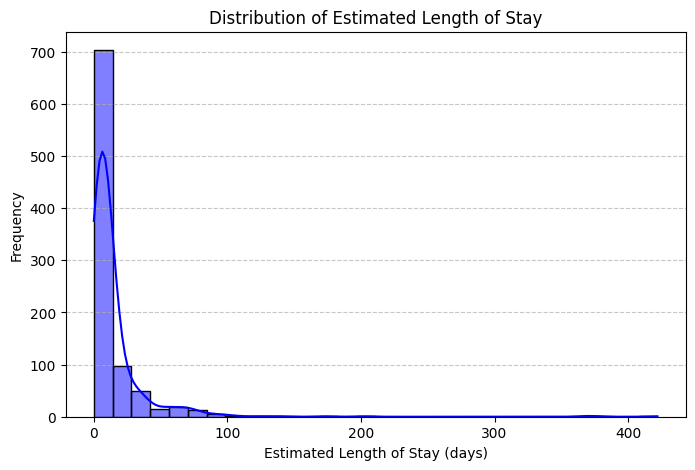

In [18]:
# Plot histogram of estimated_los, ignoring NaN values
plt.figure(figsize=(8, 5))
sns.histplot(tsqic_merged_filtered['estimated_los'].dropna(), bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Estimated Length of Stay (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Length of Stay')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [19]:
# Find rows where estimated_los is greater than 60
tsqic_merged_filtered[tsqic_merged_filtered['estimated_los'] > 60]

,id,operation_date,readmission_30d,DischargeDate,postop_comp,estimated_los
4,78,2019-09-03,NaN,2020-09-10,0,373.0
41,269,2020-03-18,0.0,2020-06-02,1,76.0
43,269,2019-11-27,0.0,2020-02-11,1,76.0
97,587,2020-02-14,NaN,2021-04-11,0,422.0
134,665,2016-11-16,0.0,2017-02-13,1,89.0
141,668,2016-11-10,0.0,2017-01-19,1,70.0
153,679,2016-11-17,0.0,2017-01-30,1,74.0
157,683,2016-12-13,0.0,2017-02-17,1,66.0
170,699,2017-06-20,0.0,2017-09-06,1,78.0
198,734,2017-08-01,0.0,2017-10-08,1,68.0


In [20]:
tsqic_merged_filtered

,id,operation_date,readmission_30d,DischargeDate,postop_comp,estimated_los
0,37,2023-05-03,NaN,2023-05-06,0,3.0
1,44,2019-05-21,NaN,2019-05-23,0,2.0
2,55,2019-10-22,NaN,2019-10-28,0,6.0
3,76,2021-05-18,0.0,2021-05-25,1,7.0
4,78,2019-09-03,NaN,2020-09-10,0,373.0
...,...,...,...,...,...,...
924,1712,2024-08-20,0.0,2024-08-28,1,8.0
925,1722,2024-08-27,0.0,2024-09-03,1,7.0
926,1748,2024-07-23,0.0,2024-07-30,1,7.0
927,1748,2024-08-13,0.0,2024-08-30,1,17.0


In [21]:
# Step 1: Sort the dataframe so that rows with readmission_30d=1 come first within each group
# This ensures that when we drop duplicates later, we'll keep the readmission=1 rows
sorted_df = tsqic_merged_filtered.sort_values('readmission_30d', ascending=False)

# Step 2: Drop duplicates, keeping the first occurrence (which will be readmission=1 if it exists)
result = sorted_df.drop_duplicates(subset=['id', 'operation_date', 'DischargeDate', 'postop_comp'], keep='first')
result = result.sort_values(by=['id'])
tsqic_merged_filtered = result.copy()
tsqic_merged_filtered


,id,operation_date,readmission_30d,DischargeDate,postop_comp,estimated_los
0,37,2023-05-03,NaN,2023-05-06,0,3.0
1,44,2019-05-21,NaN,2019-05-23,0,2.0
2,55,2019-10-22,NaN,2019-10-28,0,6.0
3,76,2021-05-18,0.0,2021-05-25,1,7.0
5,78,2019-12-10,NaN,2019-12-12,0,2.0
...,...,...,...,...,...,...
923,1706,2024-07-17,0.0,2024-07-31,1,14.0
924,1712,2024-08-20,0.0,2024-08-28,1,8.0
925,1722,2024-08-27,0.0,2024-09-03,1,7.0
927,1748,2024-08-13,0.0,2024-08-30,1,17.0


In [22]:
# Save to a new Excel file
tsqic_merged_filtered.to_excel("Merged_TSQIC.xlsx", index=False)

# REDCap merging

In [23]:
# Read the CSV file - emotional distress 
file_path = "../Samir/ESO_DATA19March2025_.csv"
df_redcap = pd.read_csv(file_path, encoding='latin-1').iloc[:, 14:]
df_redcap

/tmp/ipykernel_491726/3151475234.py:3: DtypeWarning: Columns (34,35,42,118,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_redcap = pd.read_csv(file_path, encoding='latin-1').iloc[:, 14:]


,id,redcap_event_name,redcap_repeat_instrument,redcap_repeat_instance,gender,dob,age_diagnosis,overall_regional_ln,overall_distant_metastasis,procedure123456,...,bx_pathology___4,bx_pathology___5,bx_pathology___6,bx_pathology___7,bx_path_other,adeno_cstage,scc_cstage,cstage,level_tumor,cstaging_and_diagnosis_complete
0,1,baseline_arm_1,NaN,NaN,1.0,08/04/49,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5_years_postop_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,baseline_arm_1,cstaging_and_diagnosis,1.0,NaN,NaN,NaN,0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,2,NaN,NaN,2.0
3,1,surgery_arm_1,surgery_esd_emr,1.0,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,surgery_arm_1,surgical_pathology,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,1770,preoperative_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17036,1770,baseline_arm_1,cstaging_and_diagnosis,1.0,NaN,NaN,42.054252,0,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,7.0,2.0
17037,1770,preoperative_arm_1,edmonton_symptom_assessment_system_esas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17038,1770,preoperative_arm_1,functional_assessment_of_cancer_therapy_fact_e...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Column name change before merged 
df_redcap = df_redcap.rename(columns={"complication_date": "ComplicationDate", "system": "System", "discharge_date": "DischargeDate", "sx_date": "operation_date"})

In [25]:
#exclude ESD and EMR 
columns_to_extract = ["id", "operation_date", "redcap_event_name", "postop_comp", "ComplicationDate", "los", "readmission_30d", "DischargeDate", 
                    "dob", "qol_date", "age_diagnosis", "gender", "overall_primary_tumour", "overall_regional_ln", "overall_distant_metastasis", 
                    "neotx___notx","neotx___chemo","neotx___rads","neotx___chemorads","neotx___immuno", "neotx___other", "procedure123456",
                    "expectation_treatment", "path_esoph_primtumour", "path_esoph_regionalln", "path_esoph_distantmetast"] + \
                    [f"gp{i}" for i in range(1, 8)] + [f"gs{i}" for i in range(1, 8)] + [f"ge{i}" for i in range(1, 7)] \
                    + [f"gf{i}" for i in range(1, 8)] + [f"a_hn{i}" for i in range(1, 6)] + ["a_hn7", "a_hn10"] \
                    + [f"a_e{i}" for i in range(1, 8)] + ["a_c6", "a_c2"] + ["a_act11"]
df_redcap = df_redcap[columns_to_extract].copy()
df_redcap

,id,operation_date,redcap_event_name,postop_comp,ComplicationDate,los,readmission_30d,DischargeDate,dob,qol_date,...,a_e1,a_e2,a_e3,a_e4,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11
0,1,NaN,baseline_arm_1,NaN,NaN,NaN,NaN,NaN,08/04/49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,5_years_postop_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,baseline_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,09/13/06,surgery_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,surgery_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,1770,NaN,preoperative_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17036,1770,NaN,baseline_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17037,1770,NaN,preoperative_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17038,1770,NaN,preoperative_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,02/24/25,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0


In [26]:
#convert to datetime
df_redcap['operation_date'] = pd.to_datetime(df_redcap['operation_date'], errors='coerce')  
df_redcap['ComplicationDate'] = pd.to_datetime(df_redcap['ComplicationDate'], errors='coerce')  
df_redcap['dob'] = pd.to_datetime(df_redcap['dob'], errors='coerce')  
df_redcap['qol_date'] = pd.to_datetime(df_redcap['qol_date'], errors='coerce')  
df_redcap['DischargeDate'] = pd.to_datetime(df_redcap['DischargeDate'], errors='coerce')  
df_redcap

/tmp/ipykernel_491726/710410805.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_redcap['operation_date'] = pd.to_datetime(df_redcap['operation_date'], errors='coerce')
/tmp/ipykernel_491726/710410805.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_redcap['ComplicationDate'] = pd.to_datetime(df_redcap['ComplicationDate'], errors='coerce')
/tmp/ipykernel_491726/710410805.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_redcap['dob'] = pd.to_datetime(df_redcap['dob'], errors='coerce')
/tmp/ipykernel_491726/710410805.py:5: UserWarning: Could not infer format

,id,operation_date,redcap_event_name,postop_comp,ComplicationDate,los,readmission_30d,DischargeDate,dob,qol_date,...,a_e1,a_e2,a_e3,a_e4,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11
0,1,NaT,baseline_arm_1,NaN,NaT,NaN,NaN,NaT,2049-08-04,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaT,5_years_postop_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaT,baseline_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2006-09-13,surgery_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaT,surgery_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,1770,NaT,preoperative_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17036,1770,NaT,baseline_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17037,1770,NaT,preoperative_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17038,1770,NaT,preoperative_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,2025-02-24,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0


In [27]:
#Validate the number of unique ids and redcap_event_name.
print(df_redcap["id"].nunique())
df_redcap[['id', 'redcap_event_name','operation_date']].drop_duplicates()

1754


,id,redcap_event_name,operation_date
0,1,baseline_arm_1,NaT
1,1,5_years_postop_arm_1,NaT
3,1,surgery_arm_1,2006-09-13
4,1,surgery_arm_1,NaT
12,2,baseline_arm_1,NaT
...,...,...,...
17028,1768,baseline_arm_1,NaT
17030,1769,baseline_arm_1,NaT
17034,1770,baseline_arm_1,NaT
17035,1770,preoperative_arm_1,NaT


In [28]:
df_redcap.to_excel("Merged_REDCap.xlsx", index=False)

# TSQIC REDCap_FactE merging

In [29]:
#Create a copy of merged_matched
merged_tsqic = tsqic_merged_filtered.copy()

#Rename estimated_los to los to match collapsed_redcap
merged_tsqic = merged_tsqic.rename(columns={'estimated_los': 'los'})

merged_tsqic

,id,operation_date,readmission_30d,DischargeDate,postop_comp,los
0,37,2023-05-03,NaN,2023-05-06,0,3.0
1,44,2019-05-21,NaN,2019-05-23,0,2.0
2,55,2019-10-22,NaN,2019-10-28,0,6.0
3,76,2021-05-18,0.0,2021-05-25,1,7.0
5,78,2019-12-10,NaN,2019-12-12,0,2.0
...,...,...,...,...,...,...
923,1706,2024-07-17,0.0,2024-07-31,1,14.0
924,1712,2024-08-20,0.0,2024-08-28,1,8.0
925,1722,2024-08-27,0.0,2024-09-03,1,7.0
927,1748,2024-08-13,0.0,2024-08-30,1,17.0


In [30]:
df_redcap

,id,operation_date,redcap_event_name,postop_comp,ComplicationDate,los,readmission_30d,DischargeDate,dob,qol_date,...,a_e1,a_e2,a_e3,a_e4,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11
0,1,NaT,baseline_arm_1,NaN,NaT,NaN,NaN,NaT,2049-08-04,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaT,5_years_postop_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaT,baseline_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2006-09-13,surgery_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaT,surgery_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,1770,NaT,preoperative_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17036,1770,NaT,baseline_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17037,1770,NaT,preoperative_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17038,1770,NaT,preoperative_arm_1,NaN,NaT,NaN,NaN,NaT,NaT,2025-02-24,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0


In [31]:
merged_df = merged_tsqic.merge(df_redcap, on=['id', 'operation_date'], how='outer')
merged_df

,id,operation_date,readmission_30d_x,DischargeDate_x,postop_comp_x,los_x,redcap_event_name,postop_comp_y,ComplicationDate,los_y,...,a_e1,a_e2,a_e3,a_e4,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11
0,1,NaT,NaN,NaT,NaN,NaN,baseline_arm_1,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaT,NaN,NaT,NaN,NaN,5_years_postop_arm_1,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaT,NaN,NaT,NaN,NaN,baseline_arm_1,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaT,NaN,NaT,NaN,NaN,surgery_arm_1,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaT,NaN,NaT,NaN,NaN,surgery_arm_1,1.0,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17366,1770,NaT,NaN,NaT,NaN,NaN,preoperative_arm_1,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17367,1770,NaT,NaN,NaT,NaN,NaN,baseline_arm_1,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17368,1770,NaT,NaN,NaT,NaN,NaN,preoperative_arm_1,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17369,1770,NaT,NaN,NaT,NaN,NaN,preoperative_arm_1,NaN,NaT,NaN,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0


In [32]:
# Get unique (id, operation_date) pairs from each dataset
pairs_tsqic = set(merged_tsqic[['id']].apply(tuple, axis=1))
pairs_redcap = set(df_redcap[['id']].apply(tuple, axis=1))

# Find pairs that appear in both
pairs_in_both = pairs_tsqic & pairs_redcap

# Find pairs only in merged_tsqic
pairs_only_in_tsqic = pairs_tsqic - pairs_redcap

# Find pairs only in collapsed_redcap
pairs_only_in_redcap = pairs_redcap - pairs_tsqic

# Print the counts
print(f"redcap unique id: {df_redcap['id'].nunique()}")
print(f"tsqic unique id: {merged_tsqic['id'].nunique()}")

print(f"Pairs in both datasets: {len(pairs_in_both)}")
print(f"Pairs only in merged_tsqic: {len(pairs_only_in_tsqic)}")
print(f"Pairs only in collapsed_redcap: {len(pairs_only_in_redcap)}")

redcap unique id: 1754
tsqic unique id: 669
Pairs in both datasets: 669
Pairs only in merged_tsqic: 0
Pairs only in collapsed_redcap: 1085


In [33]:
# Get unique IDs for pairs in both datasets
ids_in_both = {pair[0] for pair in pairs_in_both}

# Get unique IDs only in df_redcap
ids_only_in_redcap = {pair[0] for pair in pairs_only_in_redcap}

# Convert to sorted lists for better readability
ids_in_both_list = sorted(ids_in_both)
ids_only_in_redcap_list = sorted(ids_only_in_redcap)

# Print results
print("IDs in both datasets:", ids_in_both_list)
print("IDs only in df_redcap:", ids_only_in_redcap_list)

IDs in both datasets: [37, 44, 55, 76, 78, 79, 81, 89, 102, 125, 127, 128, 131, 141, 148, 151, 160, 166, 171, 190, 191, 196, 202, 223, 228, 230, 237, 260, 261, 269, 279, 324, 407, 418, 424, 459, 464, 468, 471, 473, 497, 508, 517, 521, 533, 545, 551, 560, 561, 563, 565, 566, 567, 569, 571, 572, 574, 575, 579, 581, 583, 585, 587, 589, 590, 591, 592, 597, 599, 603, 612, 614, 615, 625, 634, 639, 647, 648, 649, 651, 652, 653, 658, 659, 661, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 677, 678, 679, 680, 682, 683, 684, 685, 686, 688, 689, 690, 693, 694, 695, 696, 698, 699, 700, 702, 704, 706, 707, 708, 709, 710, 712, 713, 714, 717, 718, 719, 721, 722, 723, 724, 725, 726, 727, 728, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 742, 744, 746, 747, 748, 750, 751, 752, 753, 754, 755, 757, 758, 759, 760, 762, 763, 764, 765, 766, 767, 769, 770, 773, 775, 778, 779, 781, 783, 784, 785, 786, 788, 790, 791, 792, 796, 797, 798, 799, 800, 801, 802, 803, 806, 807, 808, 809, 

In [34]:
# base is df_redcap and fill NaNs with merged_tsqic
for col in merged_df.columns:
    if col.endswith('_y'):
        base_col = col[:-2]  # Remove _y to get base name
        x_col = base_col + '_x'

        if x_col in merged_df.columns:
            # Use `_y` as the base and fill NaNs with `_x`
            merged_df[base_col] = merged_df[col].combine_first(merged_df[x_col])
            merged_df.drop([col, x_col], axis=1, inplace=True)
merged_df

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,postop_comp,los,readmission_30d,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1,NaT,5_years_postop_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1,NaT,baseline_arm_1,NaT,NaT,NaT,NaN,NaN,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17366,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17367,1770,NaT,baseline_arm_1,NaT,NaT,NaT,42.054252,NaN,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17368,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17369,1770,NaT,preoperative_arm_1,NaT,NaT,2025-02-24,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,3.0,3.0,NaN,NaN,NaN,NaT


In [35]:
non_null_counts = merged_df.notna().sum(axis=1)

# Find rows where only one column is filled - for sanitary check
merged_df[non_null_counts == 1]

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,postop_comp,los,readmission_30d,DischargeDate


In [36]:
# Find rows where 'los' is not null but 'operation_date' or 'ComplicationDate' is missing -> most likely another row has duplicated operation_date and complication date.
missing_dates_rows = merged_df[(merged_df['los'].notna()) & 
                            (merged_df['operation_date'].isna() | merged_df['DischargeDate'].isna())]

# Select relevant columns (row number and id)
result = missing_dates_rows[['id']].copy()
result['row_number'] = missing_dates_rows.index

result


,id,row_number
473,55,473
690,78,690
708,79,708
760,86,760
884,102,884
...,...,...
16162,1609,16162
16339,1628,16339
16340,1628,16340
16381,1633,16381


In [37]:
# Number of rows where 'los' is duplicated within the same 'id' (ignoring NaN):  479 rows (2 or 3 duplicates) -> 0 
# Set all but one 'los' value to NaN for each duplicated group
# Create a mask for non-null 'los' values and check duplicates within each 'id'
valid_mask = merged_df['los'].notna()  # Ignore NaN values
duplicated_mask = merged_df.loc[valid_mask].duplicated(subset=['id', 'los'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_df.loc[full_mask].copy()  

# Set all but one 'los' value to NaN for each (id, los) pair, keeping one of each unique los value
merged_df.loc[full_mask, 'los'] = merged_df.loc[full_mask].groupby(['id', 'los'])['los'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'los' was modified: {full_mask.sum()}")

Number of rows where 'los' was modified: 387


In [38]:
#Number of rows where 'operation_date' is duplicated within the same 'id' (ignoring NaN):  98 rows (2 duplicates) -> 0
# Set all but one 'operation_date' value to NaN for each duplicated group
# Create a mask for non-null 'operation_date' values and check duplicates within each 'id'
valid_mask = merged_df['operation_date'].notna()  # Ignore NaN values
duplicated_mask = merged_df.loc[valid_mask].duplicated(subset=['id', 'operation_date'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_df.loc[full_mask].copy()  


# Create a temporary Series to mark which values to keep (first occurrence = True, others = False)
keep_first = ~merged_df.loc[full_mask].duplicated(subset=['id', 'operation_date'], keep='first')

# Make a copy of the operation_date column
temp_dates = merged_df['operation_date'].copy()

# Set all duplicated dates (except first occurrence) to NaN
temp_dates.loc[full_mask] = temp_dates.loc[full_mask].where(keep_first, pd.NaT)

# Assign back to the dataframe
merged_df['operation_date'] = temp_dates

# Display results
print(f"Number of rows where 'operation_date' was modified: {full_mask.sum() - keep_first.sum()}")



# # Set all but one 'operation_date' value to NaN for each (id, operation_date) pair, keeping one of each unique operation_date value
# merged_df.loc[full_mask, 'operation_date'] = merged_df.loc[full_mask].groupby(['id', 'operation_date'])['operation_date'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# # Display results
# print(f"Number of rows where 'operation_date' was modified: {full_mask.sum()}")


Number of rows where 'operation_date' was modified: 1


In [39]:
# Number of rows where 'readmission_30d' is duplicated within the same 'id' (ignoring NaN): 246 rows (2 3 6 duplicates) -> 0
# Set all but one 'readmission_30d' value to NaN for each duplicated group
# Create a mask for non-null 'readmission_30d' values and check duplicates within each 'id'
valid_mask = merged_df['readmission_30d'].notna()  # Ignore NaN values
duplicated_mask = merged_df.loc[valid_mask].duplicated(subset=['id', 'readmission_30d'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_df.loc[full_mask].copy()  

# Set all but one 'readmission_30d' value to NaN for each (id, readmission_30d) pair, keeping one of each unique readmission_30d value
merged_df.loc[full_mask, 'readmission_30d'] = merged_df.loc[full_mask].groupby(['id', 'readmission_30d'])['readmission_30d'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'readmission_30d' was modified: {full_mask.sum()}")

Number of rows where 'readmission_30d' was modified: 203


In [40]:
#Number of rows where 'DischargeDate' is duplicated within the same 'id' (ignoring NaN): 478 rows (2 or 3 duplicates) -> 0
# Set all but one 'DischargeDate' value to NaN for each duplicated group
# Create a mask for non-null 'DischargeDate' values and check duplicates within each 'id'
valid_mask = merged_df['DischargeDate'].notna()  # Ignore NaN values
duplicated_mask = merged_df.loc[valid_mask].duplicated(subset=['id', 'DischargeDate'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_df.loc[full_mask].copy()  

# Set all but one 'DischargeDate' value to NaN for each (id, DischargeDate) pair, keeping one of each unique DischargeDate value
merged_df.loc[full_mask, 'DischargeDate'] = merged_df.loc[full_mask].groupby(['id', 'DischargeDate'])['DischargeDate'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'DischargeDate' was modified: {full_mask.sum()}")


Number of rows where 'DischargeDate' was modified: 386


In [41]:
# Number of rows where 'postop_comp' is duplicated within the same 'id' (ignoring NaN): 683 (2 3 4 5 6)rows -> 1 pair
# Set all but one 'postop_comp' value to NaN for each duplicated group
# Create a mask for non-null 'postop_comp' values and check duplicates within each 'id'
valid_mask = merged_df['postop_comp'].notna()  # Ignore NaN values
duplicated_mask = merged_df.loc[valid_mask].duplicated(subset=['id', 'postop_comp'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_df.loc[full_mask].copy()  

# Set all but one 'postop_comp' value to NaN for each (id, postop_comp) pair, keeping one of each unique postop_comp value
merged_df.loc[full_mask, 'postop_comp'] = merged_df.loc[full_mask].groupby(['id', 'postop_comp'])['postop_comp'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'postop_comp' was modified: {full_mask.sum()}")



Number of rows where 'postop_comp' was modified: 608


In [42]:
merged_df

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,postop_comp,los,readmission_30d,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1,NaT,5_years_postop_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1,NaT,baseline_arm_1,NaT,NaT,NaT,NaN,NaN,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17366,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17367,1770,NaT,baseline_arm_1,NaT,NaT,NaT,42.054252,NaN,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17368,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17369,1770,NaT,preoperative_arm_1,NaT,NaT,2025-02-24,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,3.0,3.0,NaN,NaN,NaN,NaT


In [43]:
#sort based on id.
merged_df = merged_df.sort_values(by='id')
merged_df

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,postop_comp,los,readmission_30d,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1,NaT,5_years_postop_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1,NaT,baseline_arm_1,NaT,NaT,NaT,NaN,NaN,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17365,1770,NaT,baseline_arm_1,NaT,1982-10-12,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17366,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17367,1770,NaT,baseline_arm_1,NaT,NaT,NaT,42.054252,NaN,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17368,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [44]:
merged_final = merged_df.copy()
# Save to a new Excel file
merged_final.to_excel("Merged_TSQIC_REDCap.xlsx", index=False)

# ACCESS tabs merging

In [45]:
# Load the Excel file
file_path = "../Nisha/Complications_ACCESS_TC_21_02_2025.xlsx" #"Complications_ACCESS_TC_13_02_2025.xlsx" 
df_access = pd.read_excel(file_path, sheet_name=None)

# Display sheet names
print(df_access.keys())

# Access specific sheets/tabs
df_access_1 = df_access["Complications"]  
df_access_2 = df_access["operation"]   #df_access_2 = df_access["Admission-discharge date"] 
df_access_3 = df_access["admit-discharge"]  


print(df_access_1)
print(df_access_2)
print(df_access_3)

dict_keys(['Complications', 'operation', 'admit-discharge'])
       id  Case number Complication_Date                         Complication  \
0     253     98832874        2010-11-17         Confusion / post op delerium   
1     247     98854559        2010-06-05                  Febrile neutropenia   
2     247     98854559        2010-06-07                                  DVT   
3     251     98834084        2010-11-13                  Vocalcord paralysis   
4     251     98834084        2010-11-15                           Chyle leak   
...   ...          ...               ...                                  ...   
1501  248     98839515        2010-10-05  Atrial fibrillation / flutter / SVT   
1502  248     98839515        2010-10-06                     Anastamosis leak   
1503  239     98838392        2010-10-15                    Stroke (> 7 days)   
1504  239     98838392        2010-10-16         Confusion / post op delerium   
1505  239     98838392        2010-10-21        

In [46]:
# Standardize column names for merging
df_access_1 = df_access_1.rename(columns={"Complication_Date": "ComplicationDate", "Case number": "Case Number"})
df_access_2 = df_access_2.rename(columns={"Thoracic Surgeries_Date": "operation_date"})
df_access_3 = df_access_3.rename(columns={"Actual D/C": "DischargeDate", "Hospital Admit Date" :"admission_date"})

# Convert operation_date to datetime for proper matching
df_access_1["ComplicationDate"] = pd.to_datetime(df_access_1["ComplicationDate"])
df_access_2["operation_date"] = pd.to_datetime(df_access_2["operation_date"])

# Remove unusable columns
df_access_1 = df_access_1.drop(columns=['Complication', "Clavien score"])
df_access_1

,id,Case Number,ComplicationDate
0,253,98832874,2010-11-17
1,247,98854559,2010-06-05
2,247,98854559,2010-06-07
3,251,98834084,2010-11-13
4,251,98834084,2010-11-15
...,...,...,...
1501,248,98839515,2010-10-05
1502,248,98839515,2010-10-06
1503,239,98838392,2010-10-15
1504,239,98838392,2010-10-16


In [47]:
#Missing dates but still postop_comp happen
df_access_1['ComplicationDate'].isnull().sum()

4

In [48]:
df_access_1 = df_access_1.drop_duplicates(subset=['Case Number'])
df_access_1

,id,Case Number,ComplicationDate
0,253,98832874,2010-11-17
1,247,98854559,2010-06-05
3,251,98834084,2010-11-13
7,252,98832996,2010-11-13
14,259,98829805,2010-12-06
...,...,...,...
1483,42,99074606,2005-09-22
1488,43,99075556,2005-09-21
1489,67,99082966,2005-07-26
1501,248,98839515,2010-10-05


In [49]:
df_access_3

,id,Case Number,admission_date,DischargeDate
0,293,80699665,2011-05-31,2011-05-31
1,263,80702859,2010-11-25,2010-11-25
2,169,80704783,2010-08-12,2010-08-12
3,139,80704906,2010-08-12,2010-08-12
4,183,80704907,2010-08-12,2010-08-12
...,...,...,...,...
819,663,2016006745,2016-09-11,2016-09-26
820,973,2016006823,2016-09-13,2016-10-02
821,661,2016006893,2016-09-14,2016-10-16
822,661,2016007187,2016-09-21,2016-10-12


In [50]:
#every Case Number is unique but id is not -> IG case number is one unique admission~discharge period.
# Count occurrences of each Case Number
case_counts = df_access_3['Case Number'].value_counts()

# Filter Case Numbers that appear more than once
multiple_cases = case_counts[case_counts > 1].index

# Get all rows where Case Number is duplicated
duplicated_rows = df_access_3[df_access_3['Case Number'].isin(multiple_cases)]

duplicated_rows

,id,Case Number,admission_date,DischargeDate


In [51]:
# Remove unusable columns
df_access_3 = df_access_3.drop(columns=['admission_date'])
df_access_3

,id,Case Number,DischargeDate
0,293,80699665,2011-05-31
1,263,80702859,2010-11-25
2,169,80704783,2010-08-12
3,139,80704906,2010-08-12
4,183,80704907,2010-08-12
...,...,...,...
819,663,2016006745,2016-09-26
820,973,2016006823,2016-10-02
821,661,2016006893,2016-10-16
822,661,2016007187,2016-10-12


In [52]:
df_access_2

,id,Case Number,operation_date
0,264,98831868,2011-01-11
1,266,98827533,2011-01-12
2,265,98825176,2011-01-25
3,266,98827533,2011-01-12
4,263,98829579,2010-12-07
...,...,...,...
721,631,2016004913,2016-07-26
722,639,2016006328,2016-07-30
723,639,2016006328,2016-08-13
724,973,2016006823,2016-09-13


In [53]:
# Identify duplicate rows
duplicate_rows = df_access_2[df_access_2.duplicated(subset=['id', 'Case Number', 'operation_date'], keep=False)]

# Get unique IDs that have duplicate rows
duplicate_ids = duplicate_rows['id'].unique()

# Print or store the duplicate IDs
print("IDs with duplicate rows:", duplicate_ids)

IDs with duplicate rows: [266 262 273 535 543 232 143 338 350 263 430 443 455 459 472 467 488 486
 481 476 887 489 629 634]


In [54]:
#remove duplicate rows while keeping only one instance
df_access_2 = df_access_2.drop_duplicates(subset=['id', 'Case Number', 'operation_date'])
df_access_2

,id,Case Number,operation_date
0,264,98831868,2011-01-11
1,266,98827533,2011-01-12
2,265,98825176,2011-01-25
4,263,98829579,2010-12-07
5,263,98829579,2010-12-10
...,...,...,...
721,631,2016004913,2016-07-26
722,639,2016006328,2016-07-30
723,639,2016006328,2016-08-13
724,973,2016006823,2016-09-13


In [55]:
#So, there are ids associated with multiple distinct case numbers, but not vice versa.
inconsistent_ids = df_access_2.groupby('id')['Case Number'].nunique()
inconsistent_ids = inconsistent_ids[inconsistent_ids > 1]  # Keep only those with multiple values

if inconsistent_ids.empty:
    print("All IDs have consistent Case Numbers.")
else:
    print("Inconsistent IDs found:")
    print(inconsistent_ids)


Inconsistent IDs found:
id
1       6
7       2
13      2
18      2
25      2
       ..
624     2
662     2
881     2
887     3
1230    2
Name: Case Number, Length: 80, dtype: int64


In [56]:
#There are cases where in the Case Number, operation are more than 30 days apart.
# Get the min and max operation_date for each Case Number
case_number_date_range = df_access_2.groupby('Case Number')['operation_date'].agg(['min', 'max'])

# Calculate the difference in days
case_number_date_range['date_diff'] = (case_number_date_range['max'] - case_number_date_range['min']).dt.days

# Filter cases where the difference is greater than 30 days
cases_exceeding_30_days = case_number_date_range[case_number_date_range['date_diff'] > 30]

if cases_exceeding_30_days.empty:
    print("No Case Numbers have operation dates more than 30 days apart.")
else:
    print("Case Numbers with operation dates more than 30 days apart:")
    print(cases_exceeding_30_days)


Case Numbers with operation dates more than 30 days apart:
                   min        max  date_diff
Case Number                                 
98725220    2013-01-23 2013-04-25         92
98780308    2012-01-10 2012-02-15         36
98814596    2011-05-03 2011-06-14         42
98823212    2011-02-09 2011-05-19         99
98865052    2010-03-09 2010-04-24         46
98882670    2009-11-03 2010-03-22        139
98965040    2008-01-17 2008-03-20         63
99027109    2006-09-13 2006-11-03         51
2015004353  2015-07-07 2015-08-17         41
2016006328  2016-07-30 2016-09-02         34


In [57]:
# Keep only the row with the earliest operation_date for each Case Number
df_access_2 = df_access_2.sort_values(by=['operation_date']).groupby('Case Number', as_index=False).first()

# Reset index for cleanliness (optional)
df_access_2 = df_access_2.reset_index(drop=True)

df_access_2

,Case Number,id,operation_date
0,80699665,293,2011-05-31
1,80702859,263,2010-11-25
2,80704783,169,2010-08-12
3,80704906,139,2010-08-12
4,80704907,183,2010-08-12
...,...,...,...
574,2016005942,533,2016-08-23
575,2016005961,424,2016-08-23
576,2016006328,639,2016-07-30
577,2016006522,190,2016-09-07


In [58]:
df_access_1

,id,Case Number,ComplicationDate
0,253,98832874,2010-11-17
1,247,98854559,2010-06-05
3,251,98834084,2010-11-13
7,252,98832996,2010-11-13
14,259,98829805,2010-12-06
...,...,...,...
1483,42,99074606,2005-09-22
1488,43,99075556,2005-09-21
1489,67,99082966,2005-07-26
1501,248,98839515,2010-10-05


In [59]:
df_access_2

,Case Number,id,operation_date
0,80699665,293,2011-05-31
1,80702859,263,2010-11-25
2,80704783,169,2010-08-12
3,80704906,139,2010-08-12
4,80704907,183,2010-08-12
...,...,...,...
574,2016005942,533,2016-08-23
575,2016005961,424,2016-08-23
576,2016006328,639,2016-07-30
577,2016006522,190,2016-09-07


In [60]:
df_access_3

,id,Case Number,DischargeDate
0,293,80699665,2011-05-31
1,263,80702859,2010-11-25
2,169,80704783,2010-08-12
3,139,80704906,2010-08-12
4,183,80704907,2010-08-12
...,...,...,...
819,663,2016006745,2016-09-26
820,973,2016006823,2016-10-02
821,661,2016006893,2016-10-16
822,661,2016007187,2016-10-12


In [61]:
# Merge with cartesian product for matched rows
merged_matched_access12 = df_access_1.merge(df_access_2, on=["Case Number", "id"], how="outer")

merged_matched_access12

,id,Case Number,ComplicationDate,operation_date
0,293,80699665,NaT,2011-05-31
1,263,80702859,NaT,2010-11-25
2,169,80704783,NaT,2010-08-12
3,139,80704906,NaT,2010-08-12
4,183,80704907,NaT,2010-08-12
...,...,...,...,...
622,533,2016005942,NaT,2016-08-23
623,424,2016005961,2016-08-23,2016-08-23
624,639,2016006328,NaT,2016-07-30
625,190,2016006522,NaT,2016-09-07


In [62]:
# Display the result 
merged_matched_access = merged_matched_access12.merge(df_access_3, on=["Case Number", "id"], how="outer")
merged_matched_access

,id,Case Number,ComplicationDate,operation_date,DischargeDate
0,293,80699665,NaT,2011-05-31,2011-05-31
1,263,80702859,NaT,2010-11-25,2010-11-25
2,169,80704783,NaT,2010-08-12,2010-08-12
3,139,80704906,NaT,2010-08-12,2010-08-12
4,183,80704907,NaT,2010-08-12,2010-08-12
...,...,...,...,...,...
819,663,2016006745,NaT,NaT,2016-09-26
820,973,2016006823,NaT,2016-09-13,2016-10-02
821,661,2016006893,NaT,NaT,2016-10-16
822,661,2016007187,NaT,NaT,2016-10-12


In [63]:
#No duplicates
duplicates = merged_matched_access.duplicated(subset=['Case Number'], keep=False)

# Display rows that have duplicates
duplicated_rows = merged_matched_access[duplicates]

duplicated_rows

,id,Case Number,ComplicationDate,operation_date,DischargeDate


In [64]:
# Identify violation rows (beyond 90 days, excluding NA)
violation_rows = merged_matched_access[
    (merged_matched_access["ComplicationDate"].notna()) &
    (merged_matched_access["operation_date"].notna()) &
    ((merged_matched_access["ComplicationDate"] - 
    merged_matched_access["operation_date"]).dt.days > 90)
]

# Display the violating rows with relevant columns
print(violation_rows[["operation_date", "ComplicationDate"]])

Empty DataFrame
Columns: [operation_date, ComplicationDate]
Index: []


In [65]:
#create a new binary column postop_comp
merged_matched_access['postop_comp'] = merged_matched_access['ComplicationDate'].notna().astype(int)
merged_matched_access

,id,Case Number,ComplicationDate,operation_date,DischargeDate,postop_comp
0,293,80699665,NaT,2011-05-31,2011-05-31,0
1,263,80702859,NaT,2010-11-25,2010-11-25,0
2,169,80704783,NaT,2010-08-12,2010-08-12,0
3,139,80704906,NaT,2010-08-12,2010-08-12,0
4,183,80704907,NaT,2010-08-12,2010-08-12,0
...,...,...,...,...,...,...
819,663,2016006745,NaT,NaT,2016-09-26,0
820,973,2016006823,NaT,2016-09-13,2016-10-02,0
821,661,2016006893,NaT,NaT,2016-10-16,0
822,661,2016007187,NaT,NaT,2016-10-12,0


In [66]:
# Remove unusable columns
merged_matched_access = merged_matched_access.drop(columns=["ComplicationDate"])
merged_matched_access

,id,Case Number,operation_date,DischargeDate,postop_comp
0,293,80699665,2011-05-31,2011-05-31,0
1,263,80702859,2010-11-25,2010-11-25,0
2,169,80704783,2010-08-12,2010-08-12,0
3,139,80704906,2010-08-12,2010-08-12,0
4,183,80704907,2010-08-12,2010-08-12,0
...,...,...,...,...,...
819,663,2016006745,NaT,2016-09-26,0
820,973,2016006823,2016-09-13,2016-10-02,0
821,661,2016006893,NaT,2016-10-16,0
822,661,2016007187,NaT,2016-10-12,0


In [67]:
#los: difference between these two dates most often corresponds with length of stay, LOS
merged_matched_access["los"] = (merged_matched_access["DischargeDate"] - merged_matched_access["operation_date"]).dt.days
print(merged_matched_access["los"].describe())  # Summary statistics
print("\n\n")
print(merged_matched_access[merged_matched_access["los"] < 0])  # Check for negative LOS values
print("\n\n")
print(merged_matched_access[merged_matched_access["los"].isna()])  # Check for missing values


count     578.000000
mean       18.922145
std        93.049785
min       -13.000000
25%         6.000000
50%         9.000000
75%        16.000000
max      2194.000000
Name: los, dtype: float64



      id  Case Number operation_date DischargeDate  postop_comp   los
176  314     98782217     2011-12-10    2011-11-27            0 -13.0
229  285     98809355     2011-05-30    2011-05-27            0  -3.0
602  438   2014005660     2014-08-07    2014-08-06            0  -1.0



      id  Case Number operation_date DischargeDate  postop_comp  los
44   392     98702001            NaT    2013-08-12            0  NaN
45   375     98702641            NaT    2013-07-19            0  NaN
47   386     98703744            NaT    2013-07-04            0  NaN
48   336     98705667            NaT    2013-06-28            0  NaN
52   294     98709113            NaT    2013-05-24            0  NaN
..   ...          ...            ...           ...          ...  ...
818  817   2016006528            NaT 

In [68]:
merged_matched_access = merged_matched_access[~(merged_matched_access["los"] < 0)]

merged_matched_access

,id,Case Number,operation_date,DischargeDate,postop_comp,los
0,293,80699665,2011-05-31,2011-05-31,0,0.0
1,263,80702859,2010-11-25,2010-11-25,0,0.0
2,169,80704783,2010-08-12,2010-08-12,0,0.0
3,139,80704906,2010-08-12,2010-08-12,0,0.0
4,183,80704907,2010-08-12,2010-08-12,0,0.0
...,...,...,...,...,...,...
819,663,2016006745,NaT,2016-09-26,0,NaN
820,973,2016006823,2016-09-13,2016-10-02,0,19.0
821,661,2016006893,NaT,2016-10-16,0,NaN
822,661,2016007187,NaT,2016-10-12,0,NaN


In [69]:
# Save to a new Excel file
merged_matched_access.to_excel("Merged_ACCESS.xlsx", index=False)

# TSQIC REDCap_FactE ACCESS merging

In [70]:
merged_final

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,postop_comp,los,readmission_30d,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1,NaT,5_years_postop_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1,NaT,baseline_arm_1,NaT,NaT,NaT,NaN,NaN,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17365,1770,NaT,baseline_arm_1,NaT,1982-10-12,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17366,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17367,1770,NaT,baseline_arm_1,NaT,NaT,NaT,42.054252,NaN,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17368,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [71]:
#remove columns not using
merged_matched_access = merged_matched_access.drop(columns=['Case Number'])
merged_matched_access

,id,operation_date,DischargeDate,postop_comp,los
0,293,2011-05-31,2011-05-31,0,0.0
1,263,2010-11-25,2010-11-25,0,0.0
2,169,2010-08-12,2010-08-12,0,0.0
3,139,2010-08-12,2010-08-12,0,0.0
4,183,2010-08-12,2010-08-12,0,0.0
...,...,...,...,...,...
819,663,NaT,2016-09-26,0,NaN
820,973,2016-09-13,2016-10-02,0,19.0
821,661,NaT,2016-10-16,0,NaN
822,661,NaT,2016-10-12,0,NaN


In [72]:
merged_final_tsqic_redcap_access = merged_matched_access.merge(merged_final, on=['id', 'operation_date'], how='outer')
merged_final_tsqic_redcap_access

,id,operation_date,DischargeDate_x,postop_comp_x,los_x,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,postop_comp_y,los_y,readmission_30d,DischargeDate_y
0,1,NaT,2012-04-27,0.0,NaN,baseline_arm_1,NaT,2049-08-04,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1,NaT,2012-04-27,0.0,NaN,5_years_postop_arm_1,NaT,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1,NaT,2012-04-27,0.0,NaN,baseline_arm_1,NaT,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1,NaT,2012-04-27,0.0,NaN,surgery_arm_1,NaT,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1,NaT,2012-04-27,0.0,NaN,surgery_arm_1,NaT,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18182,1770,NaT,NaT,NaN,NaN,baseline_arm_1,NaT,1982-10-12,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18183,1770,NaT,NaT,NaN,NaN,preoperative_arm_1,NaT,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18184,1770,NaT,NaT,NaN,NaN,baseline_arm_1,NaT,NaT,NaT,42.054252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18185,1770,NaT,NaT,NaN,NaN,preoperative_arm_1,NaT,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [73]:
# Get unique (id, operation_date) pairs from each dataset
pairs_access = set(merged_matched_access[['id']].apply(tuple, axis=1))
pairs_redcap_tsqic = set(merged_final[['id']].apply(tuple, axis=1))

# Find pairs that appear in both
pairs_in_both = pairs_access & pairs_redcap_tsqic

# Find pairs only in merged_matched_access
pairs_only_in_access = pairs_access - pairs_redcap_tsqic

# Find pairs only in redcap_tsqic
pairs_only_in_redcap_tsqic = pairs_redcap_tsqic - pairs_access

# Print the counts
print(f"redcap_tsqic unique id: {merged_final['id'].nunique()}")
print(f"access unique id: {merged_matched_access['id'].nunique()}")

print(f"Pairs in both datasets: {len(pairs_in_both)}")
print(f"Pairs only in access: {len(pairs_only_in_access)}")
print(f"Pairs only in redcap_tsqic: {len(pairs_only_in_redcap_tsqic)}")

redcap_tsqic unique id: 1754
access unique id: 513
Pairs in both datasets: 513
Pairs only in access: 0
Pairs only in redcap_tsqic: 1241


In [74]:
# base is redcap_tsqic and fill NaNs with access
for col in merged_final_tsqic_redcap_access.columns:
    if col.endswith('_y'):
        base_col = col[:-2]  # Remove _y to get base name
        x_col = base_col + '_x'

        if x_col in merged_final_tsqic_redcap_access.columns:
            # Use `_y` as the base and fill NaNs with `_x`
            merged_final_tsqic_redcap_access[base_col] = merged_final_tsqic_redcap_access[col].combine_first(merged_final_tsqic_redcap_access[x_col])
            merged_final_tsqic_redcap_access.drop([col, x_col], axis=1, inplace=True)
merged_final_tsqic_redcap_access

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,readmission_30d,postop_comp,los,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-04-27
1,1,NaT,5_years_postop_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-04-27
2,1,NaT,baseline_arm_1,NaT,NaT,NaT,NaN,NaN,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-04-27
3,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-04-27
4,1,NaT,surgery_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2012-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18182,1770,NaT,baseline_arm_1,NaT,1982-10-12,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18183,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18184,1770,NaT,baseline_arm_1,NaT,NaT,NaT,42.054252,NaN,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18185,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [75]:
non_null_counts = merged_final_tsqic_redcap_access.notna().sum(axis=1)

# Find rows where only one column is filled - for sanitary check
merged_final_tsqic_redcap_access[non_null_counts == 1]

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,readmission_30d,postop_comp,los,DischargeDate


In [76]:
# Find rows where 'los' is not null but 'operation_date' or 'ComplicationDate' is missing -> most likely another row has duplicated operation_date and complication date.
missing_dates_rows = merged_final_tsqic_redcap_access[(merged_final_tsqic_redcap_access['los'].notna()) & 
                            (merged_final_tsqic_redcap_access['operation_date'].isna() | merged_final_tsqic_redcap_access['DischargeDate'].isna())]

# Select relevant columns (row number and id)
result = missing_dates_rows[['id']].copy()
result['row_number'] = missing_dates_rows.index

result


,id,row_number
501,55,501
761,78,761
777,79,777
834,86,834
973,102,973
...,...,...
16973,1609,16973
17155,1628,17155
17162,1628,17162
17196,1633,17196


In [77]:
# Set all but one 'los' value to NaN for each duplicated group
# Create a mask for non-null 'los' values and check duplicates within each 'id'
valid_mask = merged_final_tsqic_redcap_access['los'].notna()  # Ignore NaN values
duplicated_mask = merged_final_tsqic_redcap_access.loc[valid_mask].duplicated(subset=['id', 'los'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_final_tsqic_redcap_access.loc[full_mask].copy()  

# Set all but one 'los' value to NaN for each (id, los) pair, keeping one of each unique los value
merged_final_tsqic_redcap_access.loc[full_mask, 'los'] = merged_final_tsqic_redcap_access.loc[full_mask].groupby(['id', 'los'])['los'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'los' was modified: {full_mask.sum()}")

Number of rows where 'los' was modified: 206


In [78]:
# Set all but one 'operation_date' value to NaN for each duplicated group
# Create a mask for non-null 'operation_date' values and check duplicates within each 'id'
valid_mask = merged_final_tsqic_redcap_access['operation_date'].notna()  # Ignore NaN values
duplicated_mask = merged_final_tsqic_redcap_access.loc[valid_mask].duplicated(subset=['id', 'operation_date'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_final_tsqic_redcap_access.loc[full_mask].copy()  

# Set all but one 'operation_date' value to NaN for each (id, operation_date) pair, keeping one of each unique operation_date value
merged_final_tsqic_redcap_access.loc[full_mask, 'operation_date'] = merged_final_tsqic_redcap_access.loc[full_mask].groupby(['id', 'operation_date'])['operation_date'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'operation_date' was modified: {full_mask.sum()}")

Number of rows where 'operation_date' was modified: 0


/tmp/ipykernel_491726/273570634.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  merged_final_tsqic_redcap_access.loc[full_mask, 'operation_date'] = merged_final_tsqic_redcap_access.loc[full_mask].groupby(['id', 'operation_date'])['operation_date'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))


In [79]:
# Set all but one 'readmission_30d' value to NaN for each duplicated group
# Create a mask for non-null 'readmission_30d' values and check duplicates within each 'id'
valid_mask = merged_final_tsqic_redcap_access['readmission_30d'].notna()  # Ignore NaN values
duplicated_mask = merged_final_tsqic_redcap_access.loc[valid_mask].duplicated(subset=['id', 'readmission_30d'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_final_tsqic_redcap_access.loc[full_mask].copy()  

# Set all but one 'readmission_30d' value to NaN for each (id, readmission_30d) pair, keeping one of each unique readmission_30d value
merged_final_tsqic_redcap_access.loc[full_mask, 'readmission_30d'] = merged_final_tsqic_redcap_access.loc[full_mask].groupby(['id', 'readmission_30d'])['readmission_30d'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'readmission_30d' was modified: {full_mask.sum()}")

Number of rows where 'readmission_30d' was modified: 69


In [80]:
# Set all but one 'DischargeDate' value to NaN for each duplicated group
# Create a mask for non-null 'DischargeDate' values and check duplicates within each 'id'
valid_mask = merged_final_tsqic_redcap_access['DischargeDate'].notna()  # Ignore NaN values
duplicated_mask = merged_final_tsqic_redcap_access.loc[valid_mask].duplicated(subset=['id', 'DischargeDate'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_final_tsqic_redcap_access.loc[full_mask].copy()  

# Set all but one 'DischargeDate' value to NaN for each (id, DischargeDate) pair, keeping one of each unique DischargeDate value
merged_final_tsqic_redcap_access.loc[full_mask, 'DischargeDate'] = merged_final_tsqic_redcap_access.loc[full_mask].groupby(['id', 'DischargeDate'])['DischargeDate'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'DischargeDate' was modified: {full_mask.sum()}")

Number of rows where 'DischargeDate' was modified: 2462


In [81]:
# Set all but one 'postop_comp' value to NaN for each duplicated group
# Create a mask for non-null 'postop_comp' values and check duplicates within each 'id'
valid_mask = merged_final_tsqic_redcap_access['postop_comp'].notna()  # Ignore NaN values
duplicated_mask = merged_final_tsqic_redcap_access.loc[valid_mask].duplicated(subset=['id', 'postop_comp'], keep=False)

# Re-align the mask with the original DataFrame (fill missing indexes with False)
full_mask = valid_mask.copy()
full_mask.loc[valid_mask] = duplicated_mask  

# Save the rows that will be modified (optional for debugging or checking)
duplicate_rows = merged_final_tsqic_redcap_access.loc[full_mask].copy()  

# Set all but one 'postop_comp' value to NaN for each (id, postop_comp) pair, keeping one of each unique postop_comp value
merged_final_tsqic_redcap_access.loc[full_mask, 'postop_comp'] = merged_final_tsqic_redcap_access.loc[full_mask].groupby(['id', 'postop_comp'])['postop_comp'].transform(lambda x: [x.iloc[0]] + [float('nan')] * (len(x) - 1))

# Display results
print(f"Number of rows where 'postop_comp' was modified: {full_mask.sum()}")

Number of rows where 'postop_comp' was modified: 2955


In [ ]:
# check if there are any cases where both 0 and 1 exist under the same id and DischargeDate -> it should only happen when DischargeDate is diff (readmission)
# Check if any group has both 0 and 1
conflicting_cases = merged_final_tsqic_redcap_access.groupby(['id', 'DischargeDate'])['postop_comp'].nunique().gt(1)

# Filter the cases where both 0 and 1 exist
conflicting_ids = conflicting_cases[conflicting_cases].index

# Display rows that belong to these conflicting groups
conflicting_data = merged_final_tsqic_redcap_access[merged_final_tsqic_redcap_access.set_index(['id', 'DischargeDate']).index.isin(conflicting_ids)]
conflicting_data

In [83]:
#sort based on id.
merged_final_tsqic_redcap_access = merged_final_tsqic_redcap_access.sort_values(by='id')
merged_final_tsqic_redcap_access

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,readmission_30d,postop_comp,los,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-04-27
16,1,2011-08-26 00:00:00,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-26
15,1,2010-02-20 00:00:00,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,2010-03-08
13,1,2009-02-25 00:00:00,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2009-03-05
12,1,2008-02-22 00:00:00,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2008-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18183,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18185,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18181,1770,NaT,preoperative_arm_1,NaT,NaT,2025-02-24,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,3.0,3.0,NaN,NaN,NaN,NaT
18182,1770,NaT,baseline_arm_1,NaT,1982-10-12,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [84]:
# Save to a new Excel file
merged_final_tsqic_redcap_access.to_excel("Merged_TSQIC_REDCap_ACCESS.xlsx", index=False, engine='openpyxl')

# Data cleaning (based on knowledge: reasonable condition)

In [85]:
file_path = "Merged_TSQIC_REDCap_ACCESS.xlsx" 
merged_final_tsqic_redcap_access = pd.read_excel(file_path)
merged_final_tsqic_redcap_access

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,readmission_30d,postop_comp,los,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-04-27
1,1,2011-08-26,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-26
2,1,2010-02-20,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,2010-03-08
3,1,2009-02-25,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2009-03-05
4,1,2008-02-22,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2008-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18182,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18183,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18184,1770,NaT,preoperative_arm_1,NaT,NaT,2025-02-24,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,3.0,3.0,NaN,NaN,NaN,NaT
18185,1770,NaT,baseline_arm_1,NaT,1982-10-12,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


### LOS negation removal 

In [86]:
# Check if there are any negative values in the "los" column
negative_los = merged_final_tsqic_redcap_access["los"] < 0

# Display rows where "los" is negative
negative_rows = merged_final_tsqic_redcap_access[negative_los]

# Print the result
if not negative_rows.empty:
    print("Negative values found in 'los' column:")
    print(negative_rows)
else:
    print("No negative values found in 'los' column.")


No negative values found in 'los' column.


### check LOS > 100

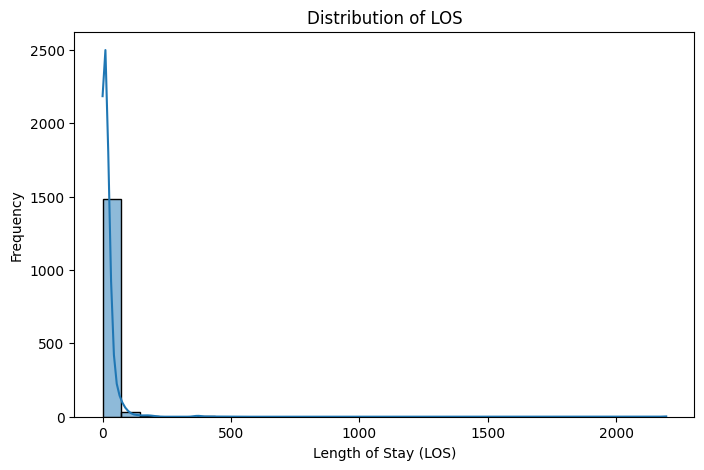

In [87]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(merged_final_tsqic_redcap_access["los"], bins=30, kde=True)

# Labels and title
plt.xlabel("Length of Stay (LOS)")
plt.ylabel("Frequency")
plt.title("Distribution of LOS")

# Show the plot
plt.show()

In [88]:
# Summary statistics
los_stats = merged_final_tsqic_redcap_access["los"].describe()
print("Summary Statistics for 'los':")
print(los_stats)

Summary Statistics for 'los':
count    1524.000000
mean       17.067585
std        62.404375
min         0.000000
25%         6.000000
50%         8.000000
75%        15.000000
max      2194.000000
Name: los, dtype: float64


In [89]:
# Find rows where LOS > 60
los_above_100 = merged_final_tsqic_redcap_access[merged_final_tsqic_redcap_access["los"] > 100]

# Display IDs and LOS values
print("\nIDs and LOS values where LOS > 100:")
print(los_above_100[["id", "los"]])  # Display both columns

# Display total count of unique IDs
print(f"\nTotal number of unique IDs with LOS > 60: {los_above_100['id'].nunique()}")
los_above_100[["id", "los"]].to_csv("multiple_duplicates.csv")


IDs and LOS values where LOS > 100:
         id     los
760      78   373.0
869      91   132.0
1146    126   131.0
1307    143   107.0
2318    242   185.0
2708    273   148.0
2848    281   162.0
4611    448   170.0
5124    489   116.0
5842    535   106.0
6526    587   422.0
7563    662  2194.0
8536    739   371.0
10816   914   108.0
10825   914   185.0
13387  1168   203.0
14714  1313   140.0
16069  1492   368.0
16136  1507   125.0
17123  1625   173.0

Total number of unique IDs with LOS > 60: 19


In [90]:
#replace los values greater than 100 with nan
merged_final_tsqic_redcap_access.loc[merged_final_tsqic_redcap_access["los"] > 100, "los"] = np.nan

### Print data

In [91]:
merged_final_tsqic_redcap_access

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,readmission_30d,postop_comp,los,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-04-27
1,1,2011-08-26,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-26
2,1,2010-02-20,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,2010-03-08
3,1,2009-02-25,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2009-03-05
4,1,2008-02-22,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2008-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18182,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18183,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18184,1770,NaT,preoperative_arm_1,NaT,NaT,2025-02-24,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,3.0,3.0,NaN,NaN,NaN,NaT
18185,1770,NaT,baseline_arm_1,NaT,1982-10-12,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [92]:
# Save to a new Excel file
merged_final_tsqic_redcap_access.to_excel("Merged_TSQIC_REDCap_ACCESS.xlsx", index=False)